# Data: Fairfax County Fire and Rescue Department call data and patient demographics 
Team: Fairfax Consultants

In [1]:
print("Hello Fairfax Consultants, Welcome Aboard")

Hello Fairfax Consultants, Welcome Aboard


In [2]:
#to get values as dict you can use the following script #https://stackoverflow.com/questions/64323745/how-to-find-the-version-of-jupyter-notebook-from-within-the-notebook
import subprocess
versions = subprocess.check_output(["jupyter", "--version"]).decode().split('\n')
parsed_versions = {}
for component in versions:
    if component == "":
        continue
    comps = list(map(str.strip, component.split(': ')))
    parsed_versions[comps[0]] = comps[1]
parsed_versions

# #Check the version
# !jupyter --version
# !python --version

{'jupyter core': '4.7.1',
 'jupyter-notebook': '6.4.3',
 'qtconsole': '5.1.0',
 'ipython': '7.26.0',
 'ipykernel': '6.2.0',
 'jupyter client': '7.0.1',
 'jupyter lab': '3.1.7',
 'nbconvert': '6.1.0',
 'ipywidgets': '7.6.3',
 'nbformat': '5.1.3',
 'traitlets': '5.0.5'}

In [3]:
#Import libraries
import os

import pandas as pd
import numpy as np
import math
#Import Viz libraries

import seaborn as sns
import matplotlib.pyplot as plt

#Altair can be installed, along with the example datasets in vega_datasets, using:$ pip install altair vega_datasets
#https://altair-viz.github.io/gallery/index.html

import altair as alt #pip install altair (from anaconda Powershell)
from vega_datasets import data # pip install vega_datasets/ #Only to use data from vegas data sets or else can be ignored

#To avoid MaxRowsError: in big data sets with altair
alt.data_transformers.disable_max_rows()
alt.data_transformers.enable('json')
#pip install altair_data_server
#alt.data_transformers.enable('data_server')
# Optional in Jupyter Notebook: requires an up-to-date vega nbextension.
#alt.renderers.enable('notebook') #$ pip install vega #https://altair-viz.github.io/user_guide/display_frontends.html

#pip install altair_viewer
#alt.renderers.enable('altair_viewer') 
#pip install altair_saver #to save interactive charts with interactive elements

DataTransformerRegistry.enable('json')

In [4]:
#Import all sheet by index
# # Set current working directory
# os.chdir("C:\\Users\\matth\\OneDrive\\Documents\\GMU\\DAEN 690\\Sponsor Files")

df = pd.read_excel("E:\DAEN_690\Data\RawData_GMU_Summer2022.xlsx", sheet_name = None)#[0,1,2,3])
#pd.ExcelFile()
print(df)

{'Patient Demographics':         Patient_ID_Internal   PatientRace     PatientEthnicity  \
0                   1014525  HI Native/PI  Non-Hispanic/Latino   
1                   1625597         Asian  Non-Hispanic/Latino   
2                    818385         White  Non-Hispanic/Latino   
3                   1726959      Black/AA  Non-Hispanic/Latino   
4                   1319018         White  Non-Hispanic/Latino   
...                     ...           ...                  ...   
186860              1627319         Asian  Non-Hispanic/Latino   
186861              1016261      Black/AA  Non-Hispanic/Latino   
186862              1226587         White  Non-Hispanic/Latino   
186863              1326193         White  Non-Hispanic/Latino   
186864              1201794         White  Non-Hispanic/Latino   

                         Patient_Race_List_Raw PatientSex PatientGender  \
0       Native Hawaiian/Other Pacific Islander     Female        Female   
1                               

In [5]:
#Imported as Dictionary, view keys or values
print(df.keys())
print(df.values())
print(df['Patient Demographics']) #view 

dict_keys(['Patient Demographics', 'sepsis', 'STEMI', 'stroke'])
dict_values([        Patient_ID_Internal   PatientRace     PatientEthnicity  \
0                   1014525  HI Native/PI  Non-Hispanic/Latino   
1                   1625597         Asian  Non-Hispanic/Latino   
2                    818385         White  Non-Hispanic/Latino   
3                   1726959      Black/AA  Non-Hispanic/Latino   
4                   1319018         White  Non-Hispanic/Latino   
...                     ...           ...                  ...   
186860              1627319         Asian  Non-Hispanic/Latino   
186861              1016261      Black/AA  Non-Hispanic/Latino   
186862              1226587         White  Non-Hispanic/Latino   
186863              1326193         White  Non-Hispanic/Latino   
186864              1201794         White  Non-Hispanic/Latino   

                         Patient_Race_List_Raw PatientSex PatientGender  \
0       Native Hawaiian/Other Pacific Islander     Fem

In [6]:
#convert Dicationary to Data Frames
PatDemo = pd.DataFrame(df['Patient Demographics'])
SEPSIS = pd.DataFrame(df['sepsis'])
STEMI = pd.DataFrame(df['STEMI'])
STROKE = pd.DataFrame(df['stroke'])

#View Headings
print("\n PatDemo:\n",PatDemo.head(1))
print("\n SEPSIS:\n",SEPSIS.head(1))
print("\n STEMI:\n",STEMI.head(1))
print("\n STROKE:\n",STROKE.head(1))


 PatDemo:
    Patient_ID_Internal   PatientRace     PatientEthnicity  \
0              1014525  HI Native/PI  Non-Hispanic/Latino   

                    Patient_Race_List_Raw PatientSex PatientGender  \
0  Native Hawaiian/Other Pacific Islander     Female        Female   

  Patient_Gender_Raw  IsJuvenileUnder18  IsSenior65+ AgeGroup_HIPAA  
0             Female                  0            0          50-59  

 SEPSIS:
   MonthYear  PtIDInternal            PrimaryImpression  isOutcomeFacility  \
0   2021-12       1780978  Infectious - Sepsis (A41.9)                  0   

  SepsisStatus                                              qSOFA  \
0        Alert  Altered Mental Status (GCS <15), Respiratory R...   

  EmergencyDepartmentDiagnosis HospitalDiagnosis  
0                          NaN               NaN  

 STEMI:
   MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2019-03        875505  Respiratory - Acute Distress/ Breathing Diffic...   

   isO

In [7]:
#View Columns for each data frame

print("\n PatDemo:\n",PatDemo.columns)
print("\n SEPSIS:\n",SEPSIS.columns )
print("\n STEMI:\n",STEMI.columns )
print("\n STROKE:\n",STROKE.columns)


 PatDemo:
 Index(['Patient_ID_Internal', 'PatientRace', 'PatientEthnicity',
       'Patient_Race_List_Raw', 'PatientSex', 'PatientGender',
       'Patient_Gender_Raw', 'IsJuvenileUnder18', 'IsSenior65+',
       'AgeGroup_HIPAA'],
      dtype='object')

 SEPSIS:
 Index(['MonthYear', 'PtIDInternal', 'PrimaryImpression', 'isOutcomeFacility',
       'SepsisStatus', 'qSOFA', 'EmergencyDepartmentDiagnosis',
       'HospitalDiagnosis'],
      dtype='object')

 STEMI:
 Index(['MonthYear', 'PtIDInternal', 'PrimaryImpression', 'isOutcomeFacility',
       'STEMIstatus', 'DoesClinicalPicSuggestAcuteMI',
       'DoesProviderInterpretstSegmentElevation', 'DoesMonitorStateAcuteMI',
       'EmergencyDepartmentDiagnosis', 'HospitalDiagnosis'],
      dtype='object')

 STROKE:
 Index(['MonthYear', 'PtIDInternal', 'PrimaryImpression', 'isOutcomeFacility',
       'StrokeStatus', 'Speech', 'FacialDroop', 'PronatorArmDrift',
       'LargeVesselOcclusionScreen', 'EmergencyDepartmentDiagnosis',
       'Hospit

In [8]:
print(PatDemo.isnull().sum())

Patient_ID_Internal         0
PatientRace              5782
PatientEthnicity         5782
Patient_Race_List_Raw    5782
PatientSex               5780
PatientGender            5780
Patient_Gender_Raw       5780
IsJuvenileUnder18           0
IsSenior65+                 0
AgeGroup_HIPAA           5786
dtype: int64


In [9]:
#Check if any columns or values are duplicated.

print("\n If any column header redundant?:",PatDemo.columns.duplicated())
print("\n Sex & Gender Duplicated?   : ",PatDemo['PatientSex'].equals(PatDemo['PatientGender']))
print("\n Race Duplicated?           : ",PatDemo['Patient_Race_List_Raw'].equals(PatDemo['PatientRace']))
print("\n Gender and GRaw Duplicated?: ",PatDemo['Patient_Gender_Raw'].equals(PatDemo['PatientGender']))
#PatDemo.columns
#even if logicaltest says not duplicated, it is okay to delete 'PatientSex',  'Patient_Gender_Raw', 'Patient_Race_List_Raw'


 If any column header redundant?: [False False False False False False False False False False]

 Sex & Gender Duplicated?   :  False

 Race Duplicated?           :  False

 Gender and GRaw Duplicated?:  False


In [10]:
#drop reduntant columns
PatDemo.drop(["Patient_Race_List_Raw", "Patient_Gender_Raw",'PatientGender'], axis =1,  inplace =True)
PatDemo.head(2)

,Patient_ID_Internal,PatientRace,PatientEthnicity,PatientSex,IsJuvenileUnder18,IsSenior65+,AgeGroup_HIPAA
0,1014525,HI Native/PI,Non-Hispanic/Latino,Female,0,0,50-59
1,1625597,Asian,Non-Hispanic/Latino,Female,0,1,80-89


In [11]:
#rename patient demographic column 'Patient_ID_Internal' to 'PtIDInternal'
PatDemo.rename(columns = {'Patient_ID_Internal':'PtIDInternal'}, inplace = True)

In [12]:
# create dummy variables
#pd.get_dummies(PatDemo['PatientSex']) #may be sex column can be binarized

In [13]:
#read unique values
PatDemo['AgeGroup_HIPAA'].unique()

array(['50-59', '80-89', '90+', '70-79',
       datetime.datetime(2022, 10, 19, 0, 0), '40-49', nan, 'Under 10',
       '20-29', '60-69', '30-39', 'Unk'], dtype=object)

In [14]:
#Convert AgeGroup_HIPAA to string to get rid of datetime format value
PatDemo['AgeGroup_HIPAA']= PatDemo['AgeGroup_HIPAA'].astype('str')
sorted(PatDemo['AgeGroup_HIPAA'].unique())


['20-29',
 '2022-10-19 00:00:00',
 '30-39',
 '40-49',
 '50-59',
 '60-69',
 '70-79',
 '80-89',
 '90+',
 'Under 10',
 'Unk',
 'nan']

In [15]:
#check the data types for rest of the columns
print(PatDemo.info())
print("\n details: \n",PatDemo['AgeGroup_HIPAA'].describe())
# PatDemo.dtypes
# PatDemo.index
# PatDemo.shape
# PatDemo.memory_usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186865 entries, 0 to 186864
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   PtIDInternal       186865 non-null  int64 
 1   PatientRace        181083 non-null  object
 2   PatientEthnicity   181083 non-null  object
 3   PatientSex         181085 non-null  object
 4   IsJuvenileUnder18  186865 non-null  int64 
 5   IsSenior65+        186865 non-null  int64 
 6   AgeGroup_HIPAA     186865 non-null  object
dtypes: int64(3), object(4)
memory usage: 10.0+ MB
None

 details: 
 count     186865
unique        12
top        70-79
freq       26567
Name: AgeGroup_HIPAA, dtype: object


In [16]:
#Replace '2022-10-19 00:00:00' with 10-19 and nan with Unk, my logic is even NULL is also unknown in a way

PatDemo["AgeGroup_HIPAA"] = PatDemo["AgeGroup_HIPAA"].replace({'2022-10-19 00:00:00': '10-19','nan':'Unk'})

sorted(PatDemo["AgeGroup_HIPAA"].unique())

# Total=sum(PatDemo['AgeGroup_HIPAA'].value_counts(dropna=True))
# Total

['10-19',
 '20-29',
 '30-39',
 '40-49',
 '50-59',
 '60-69',
 '70-79',
 '80-89',
 '90+',
 'Under 10',
 'Unk']

Lets try some vizualizations for demography distributions:

[Text(0, 0, 'Under 10'),
 Text(1, 0, '10-19'),
 Text(2, 0, '20-29'),
 Text(3, 0, '30-39'),
 Text(4, 0, '40-49'),
 Text(5, 0, '50-59'),
 Text(6, 0, '60-69'),
 Text(7, 0, '70-79'),
 Text(8, 0, '80-89'),
 Text(9, 0, '90+'),
 Text(10, 0, 'Unk')]

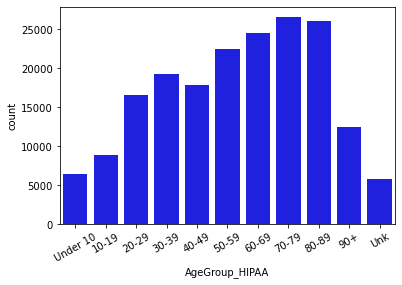

In [17]:
## count plot for age demographics
age_plot = sns.countplot(data = PatDemo, x = 'AgeGroup_HIPAA', 
              order = ['Under 10', '10-19', '20-29', '30-39', '40-49', '50-59',
                       '60-69', '70-79', '80-89', '90+','Unk'],
              color = 'b')
age_plot.set_xticklabels(age_plot.get_xticklabels(), rotation = 30)

In [18]:
#Age group distribution among different demographies

import altair as alt


source = PatDemo

PtDemchart1 = alt.Chart(source).mark_bar().encode(
    x='AgeGroup_HIPAA:O',
    y='count(AgeGroup_HIPAA):Q',
    color='PatientEthnicity:N'
)


# PtDemchart2 = alt.Chart(PatDemo).mark_bar().encode(
#      y='AgeGroup_HIPAA',
#      x='count(AgeGroup_HIPAA)',
#     color='PatientRace:N'
#  )

PtDemchart3 = alt.Chart(PatDemo).mark_bar().encode(
     x='AgeGroup_HIPAA:O',
     y='count(AgeGroup_HIPAA):Q',
    color='PatientSex:N'
 )


PtDemchart1 | PtDemchart3#PtDemchart2|



alt.HConcatChart(...)

In [19]:
#interactive brush selection charts
import altair as alt
from vega_datasets import data
alt.data_transformers.disable_max_rows()
alt.data_transformers.enable('json')
#pip install altair_data_server
#alt.data_transformers.enable('data_server')

source = PatDemo
brush = alt.selection(type='interval')

alt.Chart(source).mark_point().encode(
    x='AgeGroup_HIPAA:O',
    y='count(AgeGroup_HIPAA):Q',
    color=alt.condition(brush, 'PatientRace:O', alt.value('grey')),
).add_selection(brush)

alt.Chart(...)

In [20]:
#interactive Charts

import altair as alt
from vega_datasets import data

source = PatDemo

PatDemChart = alt.Chart(source).mark_bar().encode(
    x='AgeGroup_HIPAA:O',
    y='count(AgeGroup_HIPAA):Q',
    color='PatientSex:N',
    column='PatientRace:N',
    tooltip=['PatientEthnicity', 'PatientSex', 'AgeGroup_HIPAA', 'count(AgeGroup_HIPAA)']
).interactive()
PatDemChart .display()
#PatDemChart.save('PatDemChart.html')

alt.Chart(...)

In [21]:
#Interactive Agegroup distribution among Patient Race and Gender #https://altair-viz.github.io/gallery/streamgraph.html
import altair as alt
from vega_datasets import data

#source = pd.read_csv("E:\DAEN_690\Data\us-employment.csv")

source = PatDemo
selection = alt.selection_multi(fields=['PatientRace'], bind='legend')

PatDemInteractive= alt.Chart(source).mark_area().encode(
    alt.X('AgeGroup_HIPAA:O', axis=alt.Axis(domain=False, tickSize=0)),
    alt.Y('count(AgeGroup_HIPAA):Q', stack='center', axis=None),
    alt.Color('PatientRace:N', scale=alt.Scale(scheme='category20b')),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2)),
    tooltip=['PatientSex','PatientRace', 'AgeGroup_HIPAA', 'count(AgeGroup_HIPAA)']
  
).add_selection(
    selection
).add_selection(brush).interactive()

PatDemInteractive.display()

alt.Chart(...)

In [22]:
#Second viz
source = PatDemo
selection = alt.selection_multi(fields=['PatientRace'], bind='legend')

PatDemInteractive1= alt.Chart(source).mark_area().encode(
    alt.X('AgeGroup_HIPAA:O', axis=alt.Axis(domain=False, tickSize=0)),
    alt.Y('count(AgeGroup_HIPAA):Q', stack='center', axis=None),
    alt.Color('PatientEthnicity:N', scale=alt.Scale(scheme='category20b')),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2)),
    tooltip=['PatientSex','PatientEthnicity', 'AgeGroup_HIPAA', 'count(AgeGroup_HIPAA)']
  
).add_selection(
    selection
).add_selection(brush).interactive()

PatDemInteractive1.display()

alt.Chart(...)

In [23]:
#Age group among gender distribution

import altair as alt
from vega_datasets import data #Only to use data from vegas data sets or else can be ignored

source = PatDemo

Agegroup = alt.Chart(source).mark_circle(size=60).encode(
    x='AgeGroup_HIPAA:O',
    y='count(AgeGroup_HIPAA):Q',
    color='PatientSex:N',
    tooltip=['PatientRace:N', 'PatientSex:N', 'AgeGroup_HIPAA:O', 'count(AgeGroup_HIPAA):Q']
).interactive()
Agegroup.save('Agegroup.html')
Agegroup

alt.Chart(...)

# Lets Merge SEPSIS with Patient Demographics

In [24]:
#View Header and count null

print("\n header:\n",SEPSIS.head(2))

print("\n count null before merge:\n", SEPSIS.isnull().sum())



 header:
   MonthYear  PtIDInternal            PrimaryImpression  isOutcomeFacility  \
0   2021-12       1780978  Infectious - Sepsis (A41.9)                  0   
1   2021-12       1785587  Infectious - Sepsis (A41.9)                  1   

   SepsisStatus                                              qSOFA  \
0         Alert  Altered Mental Status (GCS <15), Respiratory R...   
1  Notification  Altered Mental Status (GCS <15), Respiratory R...   

           EmergencyDepartmentDiagnosis                     HospitalDiagnosis  
0                                   NaN                                   NaN  
1  Sepsis, unspecified organism (A41.9)  Sepsis, unspecified organism (A41.9)  

 count null before merge:
 MonthYear                          0
PtIDInternal                       0
PrimaryImpression                  0
isOutcomeFacility                  0
SepsisStatus                       0
qSOFA                            774
EmergencyDepartmentDiagnosis    1277
HospitalDiagnosis  

In [25]:
#Check if any columns or values are duplicated.
#SEPSIS['EmergencyDepartmentDiagnosis'].unique()

print("\n If any column header redundant?:",SEPSIS.columns.duplicated())

print("\n Emergency & Hospital have same values?   : ",SEPSIS['EmergencyDepartmentDiagnosis'].equals(SEPSIS['HospitalDiagnosis']))
# print("\n Race Duplicated?           : ",SEPSIS['Patient_Race_List_Raw'].equals(SEPSIS['PatientRace']))
# print("\n Gender and GRaw Duplicated?: ",SEPSIS['Patient_Gender_Raw'].equals(SEPSIS['PatientGender']))



 If any column header redundant?: [False False False False False False False False]

 Emergency & Hospital have same values?   :  False


In [26]:
## create a new column that is a combination of the emergency deparment diagnosis & hospital diagnosis
# https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-pandas-dataframe
SEPSISclean = SEPSIS

#SEPSISclean["overall_diagnosis"] = SEPSISclean["EmergencyDepartmentDiagnosis"].astype(str).fillna('') + SEPSISclean["HospitalDiagnosis"].astype(str).fillna('')
SEPSISclean["overall_diagnosis"] = SEPSISclean["EmergencyDepartmentDiagnosis"].fillna('') + SEPSISclean["HospitalDiagnosis"].fillna('')

##drop reduntant columns
#SEPSIS.drop(["EmergencyDepartmentDiagnosis", "HospitalDiagnosis"], axis =1,  inplace =True)

##View Header and count null

print("\n header:\n",SEPSISclean.head(2))

print("\n count null after merge:\n", SEPSISclean.isna().sum())
#SEPSISclean.head(10)


 header:
   MonthYear  PtIDInternal            PrimaryImpression  isOutcomeFacility  \
0   2021-12       1780978  Infectious - Sepsis (A41.9)                  0   
1   2021-12       1785587  Infectious - Sepsis (A41.9)                  1   

   SepsisStatus                                              qSOFA  \
0         Alert  Altered Mental Status (GCS <15), Respiratory R...   
1  Notification  Altered Mental Status (GCS <15), Respiratory R...   

           EmergencyDepartmentDiagnosis                     HospitalDiagnosis  \
0                                   NaN                                   NaN   
1  Sepsis, unspecified organism (A41.9)  Sepsis, unspecified organism (A41.9)   

                                   overall_diagnosis  
0                                                     
1  Sepsis, unspecified organism (A41.9)Sepsis, un...  

 count null after merge:
 MonthYear                          0
PtIDInternal                       0
PrimaryImpression                  0

In [27]:
#SEPSISclean.dtypes
print("\n count NaN after merge:\n",SEPSISclean[SEPSISclean == ''].count())
#SEPSISclean['overall_diagnosis'].eq('nannan').sum()##df1[['overall_diagnosis ', 'col3', 'col4']].eq(1).sum()


 count NaN after merge:
 MonthYear                         0
PtIDInternal                      0
PrimaryImpression                 0
isOutcomeFacility                 0
SepsisStatus                      0
qSOFA                             0
EmergencyDepartmentDiagnosis      0
HospitalDiagnosis                 0
overall_diagnosis               776
dtype: int64


In [28]:
## create a new column that is 1 if the overall_diagnosis column contains the string "A41.9", 0 if not

SEPSISclean["sepsis_outcome"] = pd.np.where(SEPSISclean["overall_diagnosis"].str.contains("Sepsis", na=False, case=False), "1", 
                                #pd.np.where(SEPSISclean["overall_diagnosis"].str.contains("sepsis", na=False), "1",
                                pd.np.where(SEPSISclean["overall_diagnosis"].str.contains("A41.9", na=False, case=False), "1", "0"))#)
SEPSISclean.head()


C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17532/3452304132.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  SEPSISclean["sepsis_outcome"] = pd.np.where(SEPSISclean["overall_diagnosis"].str.contains("Sepsis", na=False, case=False), "1",
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17532/3452304132.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(SEPSISclean["overall_diagnosis"].str.contains("A41.9", na=False, case=False), "1", "0"))#)


,MonthYear,PtIDInternal,PrimaryImpression,isOutcomeFacility,SepsisStatus,qSOFA,EmergencyDepartmentDiagnosis,HospitalDiagnosis,overall_diagnosis,sepsis_outcome
0,2021-12,1780978,Infectious - Sepsis (A41.9),0,Alert,"Altered Mental Status (GCS <15), Respiratory R...",NaN,NaN,,0
1,2021-12,1785587,Infectious - Sepsis (A41.9),1,Notification,"Altered Mental Status (GCS <15), Respiratory R...","Sepsis, unspecified organism (A41.9)","Sepsis, unspecified organism (A41.9)","Sepsis, unspecified organism (A41.9)Sepsis, un...",1
2,2021-12,1793256,Respiratory - Acute Distress/ Breathing Diffic...,1,None,NaN,"Sepsis, unspecified organism (A41.9)","Sepsis, unspecified organism (A41.9), ""Pneumon...","Sepsis, unspecified organism (A41.9)Sepsis, un...",1
3,2021-12,1772306,Infectious - Sepsis (A41.9),0,Alert,Respiratory Rate greater than 22,NaN,NaN,,0
4,2021-12,1786285,Infectious - Disease Unspecified (B99.9),1,None,NaN,"Elevated white blood cell count, unspecified (...","Elevated white blood cell count, unspecified (...","Elevated white blood cell count, unspecified (...",1


In [29]:
## create a new column that is Sepsis if the PrimaryImpression column contains the string "Sepsis", Other if not
SEPSISclean["PrimaryImpr"] = pd.np.where(SEPSISclean["PrimaryImpression"].str.contains("Sepsis", na=False, case=False), "Sepsis", 
                               
                             pd.np.where(SEPSISclean["PrimaryImpression"].str.contains("A41.9", na=False, case=False), "Sepsis", "Other"))
SEPSISclean.head()

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17532/165314508.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  SEPSISclean["PrimaryImpr"] = pd.np.where(SEPSISclean["PrimaryImpression"].str.contains("Sepsis", na=False, case=False), "Sepsis",
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17532/165314508.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(SEPSISclean["PrimaryImpression"].str.contains("A41.9", na=False, case=False), "Sepsis", "Other"))


,MonthYear,PtIDInternal,PrimaryImpression,isOutcomeFacility,SepsisStatus,qSOFA,EmergencyDepartmentDiagnosis,HospitalDiagnosis,overall_diagnosis,sepsis_outcome,PrimaryImpr
0,2021-12,1780978,Infectious - Sepsis (A41.9),0,Alert,"Altered Mental Status (GCS <15), Respiratory R...",NaN,NaN,,0,Sepsis
1,2021-12,1785587,Infectious - Sepsis (A41.9),1,Notification,"Altered Mental Status (GCS <15), Respiratory R...","Sepsis, unspecified organism (A41.9)","Sepsis, unspecified organism (A41.9)","Sepsis, unspecified organism (A41.9)Sepsis, un...",1,Sepsis
2,2021-12,1793256,Respiratory - Acute Distress/ Breathing Diffic...,1,None,NaN,"Sepsis, unspecified organism (A41.9)","Sepsis, unspecified organism (A41.9), ""Pneumon...","Sepsis, unspecified organism (A41.9)Sepsis, un...",1,Other
3,2021-12,1772306,Infectious - Sepsis (A41.9),0,Alert,Respiratory Rate greater than 22,NaN,NaN,,0,Sepsis
4,2021-12,1786285,Infectious - Disease Unspecified (B99.9),1,None,NaN,"Elevated white blood cell count, unspecified (...","Elevated white blood cell count, unspecified (...","Elevated white blood cell count, unspecified (...",1,Other


In [30]:
#Check for unique values in each columns

print("\n PImpressions Values: \n", SEPSISclean['PrimaryImpression'].unique())
print("\n PImpr Values: \n", SEPSISclean['PrimaryImpr'].unique())
print("\n Unique qSOFA values: \n",SEPSISclean['qSOFA'].unique())


 PImpressions Values: 
 ['Infectious - Sepsis (A41.9)'
 'Respiratory - Acute Distress/ Breathing Difficulty (J80)'
 'Infectious - Disease Unspecified (B99.9)' 'Fever (R50.9)'
 'Neuro - Stroke/CVA (I63.9)'
 'Endocrine - Hyperglycemia - Diabetic (E13.65)'
 'GI/GU - GI Problem Not Otherwise Listed (K92.9)'
 'Neuro - Altered Mental Status / Level of Consciousness (R41.82)'
 'CV - Chest Pain - Presumed Cardiac (I20.9)' 'Weakness (R53.1)'
 'Respiratory - Not Otherwise Listed (J98.9)'
 'Infectious - Common Cold (J00)'
 'Endocrine - Hypoglycemia - Diabetic (E13.64)'
 'Neuro - Unconscious (R40.20)' 'Infectious - Pneumonia (J18.9)'
 'Pain - Not Elsewhere Mentioned Sudden Onset (G89.1)'
 'GI/GU - Abdominal Pain Acute Onset  (R10.0)'
 'Infectious - Influenza (Flu Like Symptoms) (J11)'
 'Pain - Extremity (Non-traumatic) (M79.609)' 'CV - Hypotension (I95.9)'
 'CV - Cardiac Arrhythmia/Dysrhythmia (I49.9)'
 'GI/GU - Abdominal Pain/Problem (R10.84)'
 'Pain - Back (Non-traumatic) (M54.9)'
 'Encounter f

In [31]:
##Drop redundant column 
SEPSISclean.drop(['PrimaryImpression',"EmergencyDepartmentDiagnosis","HospitalDiagnosis","overall_diagnosis"], axis =1,  inplace =True)
SEPSISclean.head()

,MonthYear,PtIDInternal,isOutcomeFacility,SepsisStatus,qSOFA,sepsis_outcome,PrimaryImpr
0,2021-12,1780978,0,Alert,"Altered Mental Status (GCS <15), Respiratory R...",0,Sepsis
1,2021-12,1785587,1,Notification,"Altered Mental Status (GCS <15), Respiratory R...",1,Sepsis
2,2021-12,1793256,1,None,NaN,1,Other
3,2021-12,1772306,0,Alert,Respiratory Rate greater than 22,0,Sepsis
4,2021-12,1786285,1,None,NaN,1,Other


In [32]:
# merging the files how='inner' by default.
PdmSEPSIS = pd.merge(PatDemo,SEPSISclean, on='PtIDInternal') 
print(PdmSEPSIS.head(3))
#Write as .csv
PdmSEPSIS.to_excel("E:\DAEN_690\Data\PdmSEPSIS.xlsx",sheet_name='SEPSIS' , index=False)


   PtIDInternal  PatientRace     PatientEthnicity PatientSex  \
0       1522382        Asian  Non-Hispanic/Latino     Female   
1       1488855        White  Non-Hispanic/Latino       Male   
2       1547651  None Listed      Hispanic/Latino       Male   

   IsJuvenileUnder18  IsSenior65+ AgeGroup_HIPAA MonthYear  isOutcomeFacility  \
0                  0            1          80-89   2021-04                  1   
1                  0            1            90+   2021-03                  1   
2                  0            0          50-59   2021-05                  0   

   SepsisStatus                                              qSOFA  \
0  Notification  Altered Mental Status (GCS <15), Respiratory R...   
1          None  Respiratory Rate greater than 22, Systolic BP ...   
2  Notification                   Respiratory Rate greater than 22   

  sepsis_outcome PrimaryImpr  
0              0      Sepsis  
1              1       Other  
2              0       Other  


In [33]:
PdmSEPSIS.head(3)

,PtIDInternal,PatientRace,PatientEthnicity,PatientSex,IsJuvenileUnder18,IsSenior65+,AgeGroup_HIPAA,MonthYear,isOutcomeFacility,SepsisStatus,qSOFA,sepsis_outcome,PrimaryImpr
0,1522382,Asian,Non-Hispanic/Latino,Female,0,1,80-89,2021-04,1,Notification,"Altered Mental Status (GCS <15), Respiratory R...",0,Sepsis
1,1488855,White,Non-Hispanic/Latino,Male,0,1,90+,2021-03,1,None,"Respiratory Rate greater than 22, Systolic BP ...",1,Other
2,1547651,None Listed,Hispanic/Latino,Male,0,0,50-59,2021-05,0,Notification,Respiratory Rate greater than 22,0,Other


In [34]:
import altair as alt
from vega_datasets import data

source = PdmSEPSIS

PatSEPSISChart = alt.Chart(source).mark_bar().encode(
    x='AgeGroup_HIPAA:O',
    y='count(AgeGroup_HIPAA):Q',
    color='PrimaryImpr:N',
    column='SepsisStatus:N',
    tooltip=['PrimaryImpr', 'sepsis_outcome', 'AgeGroup_HIPAA', 'count(AgeGroup_HIPAA)']
).interactive()
PatSEPSISChart .display()
#PatDemChart.save('PatDemChart.html')

alt.Chart(...)

# Repeat the same process for STEMI

In [35]:
#View Header and count null

print("\n header:\n",STEMI.head(2))

print("\n count null before merge:\n", STEMI.isnull().sum())


 header:
   MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2019-03        875505  Respiratory - Acute Distress/ Breathing Diffic...   
1   2021-06       1572520        CV - Cardiac Arrhythmia/Dysrhythmia (I49.9)   

   isOutcomeFacility   STEMIstatus DoesClinicalPicSuggestAcuteMI  \
0                  0  Notification                            No   
1                  1          None                           NaN   

  DoesProviderInterpretstSegmentElevation DoesMonitorStateAcuteMI  \
0                                      No                      No   
1                                     NaN                     NaN   

  EmergencyDepartmentDiagnosis  \
0                          NaN   
1                          NaN   

                                   HospitalDiagnosis  
0                                                NaN  
1  Atherosclerotic heart disease of native corona...  

 count null before merge:
 MonthYear                              

In [36]:
#Check if any columns or values are duplicated.
#STEMI['EmergencyDepartmentDiagnosis'].unique()
print("\n If any column header redundant?:",STEMI.columns.duplicated())

print("\n Emergency & Hospital have same values?   : ",STEMI['EmergencyDepartmentDiagnosis'].equals(STEMI['HospitalDiagnosis']))
# print("\n Race Duplicated?           : ",STEMI['Patient_Race_List_Raw'].equals(STEMI['PatientRace']))
# print("\n Gender and GRaw Duplicated?: ",STEMI['Patient_Gender_Raw'].equals(STEMI['PatientGender']))


 If any column header redundant?: [False False False False False False False False False False]

 Emergency & Hospital have same values?   :  False


In [37]:
## create a new column that is a combination of the emergency deparment diagnosis & hospital diagnosis
# https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-pandas-dataframe
STEMIclean = STEMI

#STEMIclean["overall_diagnosis"] = STEMIclean["EmergencyDepartmentDiagnosis"].astype(str) + STEMIclean["HospitalDiagnosis"].astype(str)
STEMIclean["overall_diagnosis"] = STEMIclean["EmergencyDepartmentDiagnosis"].fillna('') + STEMIclean["HospitalDiagnosis"].fillna('')

##drop reduntant columns
#STEMI.drop(["EmergencyDepartmentDiagnosis", "HospitalDiagnosis"], axis =1,  inplace =True)

##View Header and count null

print("\n header:\n",STEMIclean.head(2))

print("\n count null after merge:\n", STEMIclean.isna().sum())


 header:
   MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2019-03        875505  Respiratory - Acute Distress/ Breathing Diffic...   
1   2021-06       1572520        CV - Cardiac Arrhythmia/Dysrhythmia (I49.9)   

   isOutcomeFacility   STEMIstatus DoesClinicalPicSuggestAcuteMI  \
0                  0  Notification                            No   
1                  1          None                           NaN   

  DoesProviderInterpretstSegmentElevation DoesMonitorStateAcuteMI  \
0                                      No                      No   
1                                     NaN                     NaN   

  EmergencyDepartmentDiagnosis  \
0                          NaN   
1                          NaN   

                                   HospitalDiagnosis  \
0                                                NaN   
1  Atherosclerotic heart disease of native corona...   

                                   overall_diagnosis  
0       

In [38]:
#STEMIclean.dtypes
#print("\n count NaN after merge:\n",STEMIclean[STEMIclean == 'nannan'].count()) #975
print("\n count NaN after merge:\n",STEMIclean[STEMIclean == ''].count()) #975
#STEMIclean['overall_diagnosis'].eq('nannan').sum()##df1[['overall_diagnosis ', 'col3', 'col4']].eq(1).sum()


 count NaN after merge:
 MonthYear                                    0
PtIDInternal                                 0
PrimaryImpression                            0
isOutcomeFacility                            0
STEMIstatus                                  0
DoesClinicalPicSuggestAcuteMI                0
DoesProviderInterpretstSegmentElevation      0
DoesMonitorStateAcuteMI                      0
EmergencyDepartmentDiagnosis                 0
HospitalDiagnosis                            0
overall_diagnosis                          975
dtype: int64


In [39]:
STEMIclean.head(10)

,MonthYear,PtIDInternal,PrimaryImpression,isOutcomeFacility,STEMIstatus,DoesClinicalPicSuggestAcuteMI,DoesProviderInterpretstSegmentElevation,DoesMonitorStateAcuteMI,EmergencyDepartmentDiagnosis,HospitalDiagnosis,overall_diagnosis
0,2019-03,875505,Respiratory - Acute Distress/ Breathing Diffic...,0,Notification,No,No,No,NaN,NaN,
1,2021-06,1572520,CV - Cardiac Arrhythmia/Dysrhythmia (I49.9),1,None,NaN,NaN,NaN,NaN,Atherosclerotic heart disease of native corona...,Atherosclerotic heart disease of native corona...
2,2021-02,1470216,Behavioral - Anxiety (F41.9),1,None,NaN,NaN,NaN,Other specified abnormal findings of blood che...,NaN,Other specified abnormal findings of blood che...
3,2019-01,812372,"CV - STEMI of Anterior Wall, With or Without C...",0,Notification,Uncertain,Yes,No,NaN,NaN,
4,2021-12,1768866,"CV - Myocardial Infarction (Non-STEMI), With o...",1,Alert,Yes,Yes,Yes,"Syncope and collapse (R55), ""ST elevation (STE...",NaN,"Syncope and collapse (R55), ""ST elevation (STE..."
5,2021-05,1557307,CV - Cardiac Arrhythmia/Dysrhythmia (I49.9),1,Notification,Yes,Yes,Yes,NaN,NaN,
6,2021-12,1791208,"CV - STEMI of Anterior Wall, With or Without C...",1,Alert,Yes,Yes,Yes,Shortness of breath (R06.02),Shortness of breath (R06.02),Shortness of breath (R06.02)Shortness of breat...
7,2021-08,1646640,GI/GU - Abdominal Pain/Problem (R10.84),1,None,NaN,NaN,NaN,"Urinary tract infection, site not specified (N...","Urinary tract infection, site not specified (N...","Urinary tract infection, site not specified (N..."
8,2021-04,1521472,CV - Chest Pain - Presumed Cardiac (I20.9),1,Notification,Uncertain,Uncertain,No,NaN,NaN,
9,2021-05,1547572,CV - Chest Pain - Angina (I20.0),1,None,NaN,NaN,NaN,Non-ST elevation (NSTEMI) myocardial infarctio...,Atherosclerotic heart disease of native corona...,Non-ST elevation (NSTEMI) myocardial infarctio...


In [40]:
## create a new column that is 1 if the overall_diagnosis column contains the string "A41.9", 0 if not

STEMIclean["STEMI_outcome"] = pd.np.where(STEMIclean["overall_diagnosis"].str.contains("I21.3", na=False), 1, 0)

#pd.np.where(STEMIclean["overall_diagnosis"].str.contains("(STEMI)", na=False, case=False), "1", 
                                #pd.np.where(STEMIclean["overall_diagnosis"].str.contains("STEMI", na=False), "1",
                                #)#)
print(STEMIclean.head())
#Write as .csv
STEMIclean.to_excel("E:\DAEN_690\Data\PdmSTEMI.xlsx",sheet_name='STEMI' , index=False)

  MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2019-03        875505  Respiratory - Acute Distress/ Breathing Diffic...   
1   2021-06       1572520        CV - Cardiac Arrhythmia/Dysrhythmia (I49.9)   
2   2021-02       1470216                       Behavioral - Anxiety (F41.9)   
3   2019-01        812372  CV - STEMI of Anterior Wall, With or Without C...   
4   2021-12       1768866  CV - Myocardial Infarction (Non-STEMI), With o...   

   isOutcomeFacility   STEMIstatus DoesClinicalPicSuggestAcuteMI  \
0                  0  Notification                            No   
1                  1          None                           NaN   
2                  1          None                           NaN   
3                  0  Notification                     Uncertain   
4                  1         Alert                           Yes   

  DoesProviderInterpretstSegmentElevation DoesMonitorStateAcuteMI  \
0                                      No

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17532/2261054342.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  STEMIclean["STEMI_outcome"] = pd.np.where(STEMIclean["overall_diagnosis"].str.contains("I21.3", na=False), 1, 0)


In [41]:
## create a new column that is STEMI if the PrimaryImpression column contains the string "STEMI", Other if not
STEMIclean["PrimaryImpr"] = pd.np.where(STEMIclean["PrimaryImpression"].str.contains("CV - STEMI", na=False, case=False), "STEMI","Other")   
                            
                            #pd.np.where(STEMIclean["PrimaryImpression"].str.contains("I21.0" or "I21.1" or "I21.2", na=False, case=False), "STEMI", "Other")   
                            
print(STEMIclean.head())





#Write as .csv
STEMIclean.to_excel("E:\DAEN_690\Data\PdmSTEMI.xlsx",sheet_name='STEMI' , index=False)

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17532/348275756.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  STEMIclean["PrimaryImpr"] = pd.np.where(STEMIclean["PrimaryImpression"].str.contains("CV - STEMI", na=False, case=False), "STEMI","Other")


  MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2019-03        875505  Respiratory - Acute Distress/ Breathing Diffic...   
1   2021-06       1572520        CV - Cardiac Arrhythmia/Dysrhythmia (I49.9)   
2   2021-02       1470216                       Behavioral - Anxiety (F41.9)   
3   2019-01        812372  CV - STEMI of Anterior Wall, With or Without C...   
4   2021-12       1768866  CV - Myocardial Infarction (Non-STEMI), With o...   

   isOutcomeFacility   STEMIstatus DoesClinicalPicSuggestAcuteMI  \
0                  0  Notification                            No   
1                  1          None                           NaN   
2                  1          None                           NaN   
3                  0  Notification                     Uncertain   
4                  1         Alert                           Yes   

  DoesProviderInterpretstSegmentElevation DoesMonitorStateAcuteMI  \
0                                      No

In [42]:
print("\n PImpressions Values: \n", STEMIclean['PrimaryImpression'].unique())
print("\n PImpr Values: \n", STEMIclean['PrimaryImpr'].unique())
#print("\n Unique qSOFA values: \n",SEPSISclean['qSOFA'].unique())


 PImpressions Values: 
 ['Respiratory - Acute Distress/ Breathing Difficulty (J80)'
 'CV - Cardiac Arrhythmia/Dysrhythmia (I49.9)'
 'Behavioral - Anxiety (F41.9)'
 'CV - STEMI of Anterior Wall, With or Without Chest Pain (I21.0)'
 'CV - Myocardial Infarction (Non-STEMI), With or Without Chest Pain (I21.4)'
 'GI/GU - Abdominal Pain/Problem (R10.84)'
 'CV - Chest Pain - Presumed Cardiac (I20.9)'
 'CV - Chest Pain - Angina (I20.0)'
 'Syncope - Syncopal/Fainting Episode (or Near) (R55)'
 'Neuro - Altered Mental Status / Level of Consciousness (R41.82)'
 'Respiratory - Pulmonary Edema Acute Onset (J81.0)'
 'CV - Cardiac Arrest (I46.9)'
 'Encounter for general examination without complaint, suspected or reported (Z00)'
 'CV - Hypotension (I95.9)' 'Infectious - Sepsis (A41.9)'
 'Dehydration (E86.0)'
 'CV - STEMI of other sites, With or Without Chest Pain (I21.2)'
 'Malaise (R53.81)'
 'CV - STEMI of Inferior Wall, With or Without Chest Pain (I21.1)'
 'Weakness (R53.1)' 'CV - Congestive Heart 

In [43]:
##Drop redundant column 
STEMIclean.drop(['PrimaryImpression',"EmergencyDepartmentDiagnosis","HospitalDiagnosis","overall_diagnosis"], axis =1,  inplace =True)
STEMIclean.head()

,MonthYear,PtIDInternal,isOutcomeFacility,STEMIstatus,DoesClinicalPicSuggestAcuteMI,DoesProviderInterpretstSegmentElevation,DoesMonitorStateAcuteMI,STEMI_outcome,PrimaryImpr
0,2019-03,875505,0,Notification,No,No,No,0,Other
1,2021-06,1572520,1,None,NaN,NaN,NaN,0,Other
2,2021-02,1470216,1,None,NaN,NaN,NaN,0,Other
3,2019-01,812372,0,Notification,Uncertain,Yes,No,0,STEMI
4,2021-12,1768866,1,Alert,Yes,Yes,Yes,1,Other


In [44]:
# merging the files how='inner' by default.
PdmSTEMI = pd.merge(PatDemo,STEMI, on='PtIDInternal') 
print(PdmSTEMI.head())
#Write as .csv
PdmSTEMI.to_excel("E:\DAEN_690\Data\PdmSTEMI.xlsx",sheet_name='STEMI' , index=False)

   PtIDInternal  PatientRace     PatientEthnicity PatientSex  \
0       1471290     Black/AA  Non-Hispanic/Latino       Male   
1       1542146        White  Non-Hispanic/Latino     Female   
2        818635          TMR  Non-Hispanic/Latino       Male   
3       1615472  None Listed      Hispanic/Latino       Male   
4       1741585        White  Non-Hispanic/Latino       Male   

   IsJuvenileUnder18  IsSenior65+ AgeGroup_HIPAA MonthYear  isOutcomeFacility  \
0                  0            0          50-59   2021-02                  0   
1                  0            1          60-69   2021-05                  1   
2                  0            0          50-59   2019-01                  1   
3                  0            0          50-59   2021-07                  1   
4                  0            1          80-89   2021-11                  1   

    STEMIstatus DoesClinicalPicSuggestAcuteMI  \
0  Notification                     Uncertain   
1          None               

In [45]:
print(PdmSTEMI.head())
print(PdmSTEMI.columns)

   PtIDInternal  PatientRace     PatientEthnicity PatientSex  \
0       1471290     Black/AA  Non-Hispanic/Latino       Male   
1       1542146        White  Non-Hispanic/Latino     Female   
2        818635          TMR  Non-Hispanic/Latino       Male   
3       1615472  None Listed      Hispanic/Latino       Male   
4       1741585        White  Non-Hispanic/Latino       Male   

   IsJuvenileUnder18  IsSenior65+ AgeGroup_HIPAA MonthYear  isOutcomeFacility  \
0                  0            0          50-59   2021-02                  0   
1                  0            1          60-69   2021-05                  1   
2                  0            0          50-59   2019-01                  1   
3                  0            0          50-59   2021-07                  1   
4                  0            1          80-89   2021-11                  1   

    STEMIstatus DoesClinicalPicSuggestAcuteMI  \
0  Notification                     Uncertain   
1          None               

In [46]:
import altair as alt
#from vega_datasets import data

source = PdmSTEMI

PatSTEMIChart = alt.Chart(source).mark_bar().encode(
    x='AgeGroup_HIPAA:O',
    y='count(AgeGroup_HIPAA):Q',
    color='PrimaryImpr:N',
    column='STEMIstatus:N',
    tooltip=['PrimaryImpr', 'STEMI_outcome', 'AgeGroup_HIPAA', 'count(AgeGroup_HIPAA)']
).interactive()
PatSTEMIChart .display()
#PatDemChart.save('PatDemChart.html')

alt.Chart(...)

# REPEAT Process for STROKE

In [47]:
#View Header and count null

print("\n header:\n",STROKE.head(2))

print("\n count null before merge:\n", STROKE.isnull().sum())


 header:
   MonthYear  PtIDInternal           PrimaryImpression  isOutcomeFacility  \
0   2020-04       1219470  Neuro - Stroke/CVA (I63.9)                  1   
1   2020-04       1232176  Neuro - Stroke/CVA (I63.9)                  1   

   StrokeStatus    Speech FacialDroop PronatorArmDrift  \
0         Alert  Abnormal        Left              NaN   
1  Notification  Abnormal      Normal         Abnormal   

  LargeVesselOcclusionScreen EmergencyDepartmentDiagnosis HospitalDiagnosis  
0                        NaN                          NaN               NaN  
1                   Negative                          NaN               NaN  

 count null before merge:
 MonthYear                          0
PtIDInternal                       0
PrimaryImpression                  0
isOutcomeFacility                  0
StrokeStatus                       0
Speech                           437
FacialDroop                      433
PronatorArmDrift                 780
LargeVesselOcclusionScreen 

In [48]:
#Check if any columns or values are duplicated.
#STROKE['EmergencyDepartmentDiagnosis'].unique()
print("\n If any column header redundant?:",STROKE.columns.duplicated())

print("\n Emergency & Hospital have same values?   : ",STROKE['EmergencyDepartmentDiagnosis'].equals(STROKE['HospitalDiagnosis']))
# print("\n Race Duplicated?           : ",STROKE['Patient_Race_List_Raw'].equals(STROKE['PatientRace']))
# print("\n Gender and GRaw Duplicated?: ",STROKE['Patient_Gender_Raw'].equals(STROKE['PatientGender']))


 If any column header redundant?: [False False False False False False False False False False False]

 Emergency & Hospital have same values?   :  False


In [49]:
## create a new column that is a combination of the emergency deparment diagnosis & hospital diagnosis
# https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-pandas-dataframe
STROKEclean = STROKE

STROKEclean["overall_diagnosis"] = STROKEclean["EmergencyDepartmentDiagnosis"].astype(str) + STROKEclean["HospitalDiagnosis"].astype(str)

##drop reduntant columns
#STROKE.drop(["EmergencyDepartmentDiagnosis", "HospitalDiagnosis"], axis =1,  inplace =True)

##View Header and count null

print("\n header:\n",STROKEclean.head(2))

print("\n count null after merge:\n", STROKEclean.isna().sum())


 header:
   MonthYear  PtIDInternal           PrimaryImpression  isOutcomeFacility  \
0   2020-04       1219470  Neuro - Stroke/CVA (I63.9)                  1   
1   2020-04       1232176  Neuro - Stroke/CVA (I63.9)                  1   

   StrokeStatus    Speech FacialDroop PronatorArmDrift  \
0         Alert  Abnormal        Left              NaN   
1  Notification  Abnormal      Normal         Abnormal   

  LargeVesselOcclusionScreen EmergencyDepartmentDiagnosis HospitalDiagnosis  \
0                        NaN                          NaN               NaN   
1                   Negative                          NaN               NaN   

  overall_diagnosis  
0            nannan  
1            nannan  

 count null after merge:
 MonthYear                          0
PtIDInternal                       0
PrimaryImpression                  0
isOutcomeFacility                  0
StrokeStatus                       0
Speech                           437
FacialDroop                     

In [50]:
#STROKEclean.dtypes
print("\n count NaN after merge:\n",STROKEclean[STROKEclean == 'nannan'].count())
#STROKEclean['overall_diagnosis'].eq('nannan').sum()##df1[['overall_diagnosis ', 'col3', 'col4']].eq(1).sum()


 count NaN after merge:
 MonthYear                          0
PtIDInternal                       0
PrimaryImpression                  0
isOutcomeFacility                  0
StrokeStatus                       0
Speech                             0
FacialDroop                        0
PronatorArmDrift                   0
LargeVesselOcclusionScreen         0
EmergencyDepartmentDiagnosis       0
HospitalDiagnosis                  0
overall_diagnosis               1003
dtype: int64


In [51]:
## create a new column that is 1 if the overall_diagnosis column contains the string "A41.9", 0 if not
#https://www.icd10data.com/ICD10CM/Codes/I00-I99/I60-I69/I63-/I63.9#:~:text=Cerebral%20infarction%2C%20unspecified,-2016%202017%202018&text=Billable%2FSpecific%20Code-,I63.,effective%20on%20October%201%2C%202021.

STROKEclean["STROKE_outcome"] = pd.np.where(STROKEclean["overall_diagnosis"].str.contains("STROKE", na=False, case=False), "1", 
                                #pd.np.where(STROKEclean["overall_diagnosis"].str.contains("STROKE", na=False), "1",
                                pd.np.where(STROKEclean["overall_diagnosis"].str.contains("I63.9", na=False, case=False), "1", "0"))#)

print(STROKEclean.head())
#Write as .csv
STROKEclean.to_excel("E:\DAEN_690\Data\PdmSTROKE.xlsx",sheet_name='STROKE' , index=False)

  MonthYear  PtIDInternal           PrimaryImpression  isOutcomeFacility  \
0   2020-04       1219470  Neuro - Stroke/CVA (I63.9)                  1   
1   2020-04       1232176  Neuro - Stroke/CVA (I63.9)                  1   
2   2020-04       1227568  Neuro - Stroke/CVA (I63.9)                  1   
3   2020-04       1223445  Neuro - Stroke/CVA (I63.9)                  0   
4   2020-04       1228956  Neuro - Stroke/CVA (I63.9)                  0   

   StrokeStatus    Speech FacialDroop   PronatorArmDrift  \
0         Alert  Abnormal        Left                NaN   
1  Notification  Abnormal      Normal           Abnormal   
2         Alert  Abnormal      Normal  Right Drifts Down   
3         Alert  Abnormal       Right             Normal   
4         Alert  Abnormal       Right             Normal   

  LargeVesselOcclusionScreen EmergencyDepartmentDiagnosis HospitalDiagnosis  \
0                        NaN                          NaN               NaN   
1                   Nega

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17532/1341145244.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  STROKEclean["STROKE_outcome"] = pd.np.where(STROKEclean["overall_diagnosis"].str.contains("STROKE", na=False, case=False), "1",
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17532/1341145244.py:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(STROKEclean["overall_diagnosis"].str.contains("I63.9", na=False, case=False), "1", "0"))#)


In [52]:
## create a new column that is Sepsis if the PrimaryImpression column contains the string "Sepsis", Other if not

STROKEclean["PrimaryImpr"] = pd.np.where(STROKEclean["PrimaryImpression"].str.contains("STROKE", na=False, case=False), "STROKE", 
                               
                             pd.np.where(STROKEclean["PrimaryImpression"].str.contains("I6", na=False, case=False), "STROKE", "Other"))
print(STROKEclean.head())
#Write as .csv
STROKEclean.to_excel("E:\DAEN_690\Data\PdmSTROKE.xlsx",sheet_name='STROKE' , index=False)

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17532/3547848885.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  STROKEclean["PrimaryImpr"] = pd.np.where(STROKEclean["PrimaryImpression"].str.contains("STROKE", na=False, case=False), "STROKE",
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_17532/3547848885.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(STROKEclean["PrimaryImpression"].str.contains("I6", na=False, case=False), "STROKE", "Other"))


  MonthYear  PtIDInternal           PrimaryImpression  isOutcomeFacility  \
0   2020-04       1219470  Neuro - Stroke/CVA (I63.9)                  1   
1   2020-04       1232176  Neuro - Stroke/CVA (I63.9)                  1   
2   2020-04       1227568  Neuro - Stroke/CVA (I63.9)                  1   
3   2020-04       1223445  Neuro - Stroke/CVA (I63.9)                  0   
4   2020-04       1228956  Neuro - Stroke/CVA (I63.9)                  0   

   StrokeStatus    Speech FacialDroop   PronatorArmDrift  \
0         Alert  Abnormal        Left                NaN   
1  Notification  Abnormal      Normal           Abnormal   
2         Alert  Abnormal      Normal  Right Drifts Down   
3         Alert  Abnormal       Right             Normal   
4         Alert  Abnormal       Right             Normal   

  LargeVesselOcclusionScreen EmergencyDepartmentDiagnosis HospitalDiagnosis  \
0                        NaN                          NaN               NaN   
1                   Nega

In [53]:
print("\n PImpressions Values: \n", STROKEclean['PrimaryImpression'].unique())
print("\n PImpr Values: \n", STROKEclean['PrimaryImpr'].unique())



 PImpressions Values: 
 ['Neuro - Stroke/CVA (I63.9)' 'Infectious - Sepsis (A41.9)'
 'Neuro - TIA (transient ischemic attack) (G45.9)'
 'Neuro - Headache (R51)'
 'Respiratory - Acute Distress/ Breathing Difficulty (J80)'
 'Neuro - Altered Mental Status / Level of Consciousness (R41.82)'
 'Intracranial - Stroke (CVA) Hemorrhagic (I62.9)'
 'Neuro - Neuro Problem Not Otherwise Listed (G99.8)'
 'Infectious - Influenza (Flu Like Symptoms) (J11)' 'Weakness (R53.1)'
 'CV - Hypotension (I95.9)'
 'Encounter for general examination without complaint, suspected or reported (Z00)'
 'Pain - Extremity (Non-traumatic) (M79.609)'
 'Behavioral - Mental Disorder Not Otherwise Listed (F99)'
 'Endocrine - Hypoglycemia - Diabetic (E13.64)'
 'Abuse of Drug - Alcohol (ETOH) - Intoxication (F10.92)'
 'Neuro - Unconscious (R40.20)' 'Fever (R50.9)' 'CV - Hypertension (I10)'
 'Behavioral - Anxiety (F41.9)' 'Neuro - Seizure (G40.909)'
 'Injury - Head without L.O.C. (S06.0X0A)'
 'CV - Cardiac Arrhythmia/Dysrhythm

In [54]:
##Drop redundant column 
STROKEclean.drop(['PrimaryImpression',"EmergencyDepartmentDiagnosis","HospitalDiagnosis","overall_diagnosis"], axis =1,  inplace =True)
STROKEclean.head()

,MonthYear,PtIDInternal,isOutcomeFacility,StrokeStatus,Speech,FacialDroop,PronatorArmDrift,LargeVesselOcclusionScreen,STROKE_outcome,PrimaryImpr
0,2020-04,1219470,1,Alert,Abnormal,Left,NaN,NaN,0,STROKE
1,2020-04,1232176,1,Notification,Abnormal,Normal,Abnormal,Negative,0,STROKE
2,2020-04,1227568,1,Alert,Abnormal,Normal,Right Drifts Down,Negative,0,STROKE
3,2020-04,1223445,0,Alert,Abnormal,Right,Normal,NaN,0,STROKE
4,2020-04,1228956,0,Alert,Abnormal,Right,Normal,Negative,0,STROKE


In [55]:
# merging the files how='inner' by default.
PdmSTROKE = pd.merge(PatDemo,STROKE, on='PtIDInternal') 
print(PdmSTROKE.head())
#Write as .csv
PdmSTROKE.to_excel("E:\DAEN_690\Data\PdmSTROKE.xlsx",sheet_name='STROKE' , index=False)


   PtIDInternal  PatientRace     PatientEthnicity PatientSex  \
0       1514789        White  Non-Hispanic/Latino     Female   
1       1496604        White  Non-Hispanic/Latino     Female   
2       1619115        White  Non-Hispanic/Latino       Male   
3       1363113     Black/AA  Non-Hispanic/Latino       Male   
4       1623419  None Listed      Hispanic/Latino     Female   

   IsJuvenileUnder18  IsSenior65+ AgeGroup_HIPAA MonthYear  isOutcomeFacility  \
0                  0            0          50-59   2021-04                  1   
1                  0            1          80-89   2021-03                  1   
2                  0            1          70-79   2021-07                  1   
3                  0            0          60-69   2020-10                  0   
4                  0            1          80-89   2021-07                  1   

   StrokeStatus    Speech FacialDroop     PronatorArmDrift  \
0          None       NaN         NaN                  NaN   
1  N

In [56]:
import altair as alt
#from vega_datasets import data

source = PdmSTROKE

PatSTROKEChart = alt.Chart(source).mark_bar().encode(
    x='AgeGroup_HIPAA:O',
    y='count(AgeGroup_HIPAA):Q',
    color='PrimaryImpr:N',
    column='StrokeStatus:N',
    tooltip=['PrimaryImpr', 'STROKE_outcome', 'AgeGroup_HIPAA', 'count(AgeGroup_HIPAA)']
).interactive()
PatSTROKEChart .display()
#PatDemChart.save('PatDemChart.html')

alt.Chart(...)

# Finding out the common patients across all data sets.

In [57]:
# merging the files how='inner' by default.
#PdmMerged = pd.merge(PatDemo,SEPSIS,STEMI,STROKE, on='PtIDInternal') 
PdmMerged = PatDemo.merge(SEPSIS, on='PtIDInternal').merge(STEMI,on='PtIDInternal').merge(STROKE,on='PtIDInternal')
PdmMerged 

#Alternatively
#df4 = pd.merge(pd.merge(PatDemo,SEPSIS,on='PtIDInternal'),pd.merge(STEMI,STROKE,on='PtIDInternal'))
# print(df4)
# #Write as .csv
# df4.to_excel("E:\DAEN_690\Data\RepeatingPat.xlsx",sheet_name='RepeatingPat' , index=False)

,PtIDInternal,PatientRace,PatientEthnicity,PatientSex,IsJuvenileUnder18,IsSenior65+,AgeGroup_HIPAA,MonthYear_x,isOutcomeFacility_x,SepsisStatus,...,PrimaryImpr_y,MonthYear,isOutcomeFacility,StrokeStatus,Speech,FacialDroop,PronatorArmDrift,LargeVesselOcclusionScreen,STROKE_outcome,PrimaryImpr
0,1585129,Asian,Non-Hispanic/Latino,Male,0,1,80-89,2021-06,1,None,...,Other,2021-06,1,Alert,Normal,Left,NaN,NaN,0,STROKE
1,1389021,None Listed,Hispanic/Latino,Male,0,0,40-49,2020-11,1,None,...,Other,2020-11,1,None,NaN,NaN,NaN,NaN,1,Other
2,1600193,Black/AA,Non-Hispanic/Latino,Male,0,1,70-79,2021-07,1,Notification,...,Other,2021-07,1,None,NaN,NaN,NaN,NaN,0,Other
3,1269781,White,Non-Hispanic/Latino,Male,0,0,50-59,2020-06,1,Notification,...,Other,2020-06,1,Alert,Normal,Normal,Normal,Negative,0,Other


In [58]:
# import altair as alt
# from vega_datasets import data

# chart = alt.Chart(data.cars.url).mark_point().encode(
#     x='Horsepower:Q',
#     y='Miles_per_Gallon:Q',
#     color='Origin:N'
# )

# chart.save('chart.html')

In [59]:
 #Anaconda Prompt-jupyter notebook list-for token